In [ ]:


import kagglehub

# Download latest version
path = kagglehub.dataset_download("devdope/900k-spotify")

print("Path to dataset files:", path)

In [1]:
import pandas as pd

# Settings
rows_needed = 300_000
chunk_size = 50_000  # You can adjust this as needed

chunks = []
rows_collected = 0

# Read JSON in chunks
for chunk in pd.read_json('data/900k Definitive Spotify Dataset.json', lines=True, chunksize=chunk_size):
    if rows_collected + len(chunk) >= rows_needed:
        remaining = rows_needed - rows_collected
        chunks.append(chunk.iloc[:remaining])
        break
    else:
        chunks.append(chunk)
        rows_collected += len(chunk)

# Combine into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

In [31]:
import pandas as pd

df = pd.read_json('data/final_milliondataset_BERT_500K_revised.json', lines=True)

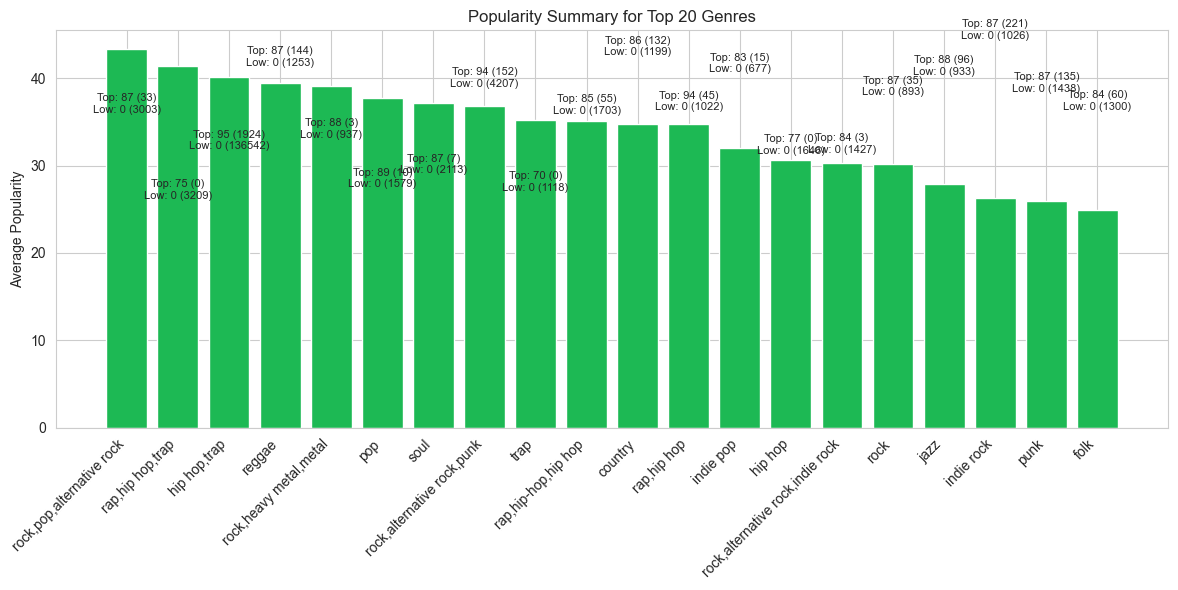

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Spotify green
spotify_green = '#1DB954'

# Select top 20 genres by count
top_genres = df['Genre'].value_counts().nlargest(20).index
filtered_df = df[df['Genre'].isin(top_genres)]

# Group and calculate stats
genre_stats = filtered_df.groupby('Genre').agg(
    avg_popularity=('Popularity', 'mean'),
    max_popularity=('Popularity', 'max'),
    min_popularity=('Popularity', 'min'),
    top_count=('Popularity', lambda x: (x > 80).sum()),
    low_count=('Popularity', lambda x: (x < 30).sum())
).reset_index()

# Sort by average popularity
genre_stats = genre_stats.sort_values(by='avg_popularity', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(genre_stats['Genre'], genre_stats['avg_popularity'], color=spotify_green)

# Add annotations
for i, row in genre_stats.iterrows():
    plt.text(i, row['avg_popularity'] + 1,
             f"Top: {row['max_popularity']:.0f} ({row['top_count']})\nLow: {row['min_popularity']:.0f} ({row['low_count']})",
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Popularity')
plt.title('Popularity Summary for Top 20 Genres')
plt.tight_layout()
plt.show()

In [33]:
df.head()

,Artist(s),song,text,Length,emotion,ISRC,Genre,Album,Release Date,Key,...,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similar Songs
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,GBBPW1200312,hip hop,Thr!!!er,29th April 2013,D min,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Corey Smith', 'Similar ..."
1,!!!,One Girl / One Boy,"Well I heard it, playing soft\nFrom a drunken ...",04:03,sadness,GBBPW1200314,hip hop,Thr!!!er,29th April 2013,A# min,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Hiroyuki Sawano', 'Simi..."
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud?\nShou...",05:51,joy,USTG30423402,hip hop,Louden Up Now,8th June 2004,A Maj,...,0,0,0,1,0,0,0,0,0,"[{'Similar Artist 1': 'Ricky Dillard', 'Simila..."
3,!!!,Ooo,[Verse 1]\nRemember when I called you on the t...,03:44,joy,GBBPW1500129,hip hop,As If,16th October 2015,A min,...,0,0,0,1,0,0,0,0,0,"[{'Similar Artist 1': 'Eric Clapton', 'Similar..."
4,!!!,Freedom 15,[Verse 1]\nCalling me like I got something to ...,06:00,joy,GBBPW1500128,hip hop,As If,16th October 2015,F min,...,0,0,0,1,0,0,0,0,0,"[{'Similar Artist 1': 'Cibo Matto', 'Similar S..."


In [3]:
df.tail()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similar Songs
299995,Mumford & Sons,Hold On to What You Believe,[Verse 1] I... I can't promise you that I won'...,04:36,anger,"rock,pop rock,alt-country",Babel (Deluxe Version),None,C# Maj,0.591716,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Mumford & Sons', 'Simil..."
299996,Mumford & Sons,Friend of the Devil,[Verse 1] I lit out from Reno I was trailed by...,04:36,sadness,"rock,pop rock,alt-country",Babel (Deluxe Version),None,C# Maj,0.591716,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Mumford & Sons', 'Simil..."
299997,Mumford & Sons,Unfinished Business,"Just give me a second, darling, to clear my he...",04:36,anger,"rock,pop rock,alt-country",Babel (Deluxe Version),None,C# Maj,0.591716,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Mumford & Sons', 'Simil..."
299998,Mumford & Sons,For Those Below,Helpless she lies across the stairs Haunting y...,04:36,fear,"rock,pop rock,alt-country",Babel (Deluxe Version),None,C# Maj,0.591716,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Mumford & Sons', 'Simil..."
299999,Mumford & Sons,Devil in Your Eye,"[Verse 1] She was darkened but light-headed, a...",04:36,fear,"rock,pop rock,alt-country",Babel (Deluxe Version),None,C# Maj,0.591716,...,0,0,0,0,0,0,0,0,0,"[{'Similar Artist 1': 'Mumford & Sons', 'Simil..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       300000 non-null  object 
 1   song                            299993 non-null  object 
 2   text                            300000 non-null  object 
 3   Length                          300000 non-null  object 
 4   emotion                         300000 non-null  object 
 5   Genre                           300000 non-null  object 
 6   Album                           300000 non-null  object 
 7   Release Date                    211920 non-null  object 
 8   Key                             300000 non-null  object 
 9   Tempo                           300000 non-null  float64
 10  Loudness (db)                   300000 non-null  float64
 11  Time signature                  299995 non-null  object 
 12  Explicit        

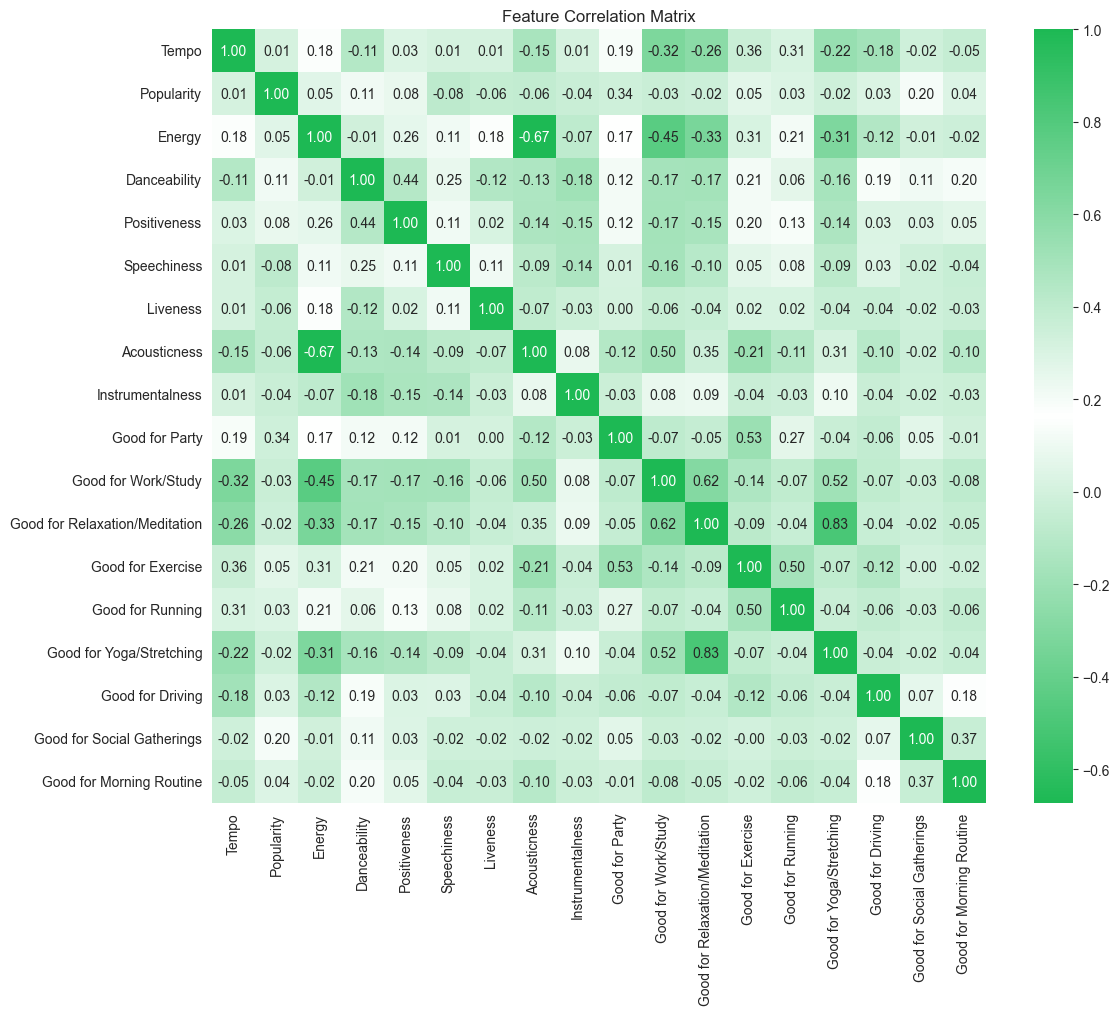

In [34]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

colors = ['#1DB954', 'white','#1DB954']
custom_cmap = LinearSegmentedColormap.from_list('spotify_green_gradient', colors)

numeric_df = df.select_dtypes(include='number')

# Step 3: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 4: Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [5]:
def length_to_seconds(length_str):
    try:
        minutes, seconds = map(int, length_str.split(':'))
        return minutes * 60 + seconds
    except:
        return None


df['Length_seconds'] = df['Length'].apply(length_to_seconds)

In [10]:
df.describe()

,Tempo,Loudness (db),Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Length_seconds
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000
mean,0.529155,0.761101,30.798843,62.091783,58.727563,46.952497,11.617873,19.704647,26.766393,7.043783,0.055480,0.081540,0.034010,0.185680,0.054313,0.024017,0.056333,0.00968,0.063640,224.053860
std,0.173214,0.073780,17.423587,22.796969,17.293367,24.123074,12.436892,16.234615,29.897646,20.388457,0.228915,0.273663,0.181255,0.388849,0.226635,0.153101,0.230565,0.09791,0.244111,82.335788
min,0.005917,0.033430,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000
25%,0.384615,0.727834,19.000000,47.000000,47.000000,27.000000,4.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,179.000000
50%,0.526627,0.776708,29.000000,64.000000,60.000000,46.000000,6.000000,13.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,214.000000
75%,0.644970,0.810501,41.000000,80.000000,72.000000,66.000000,15.000000,25.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,255.000000
max,1.000000,1.000000,100.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3502.000000


In [11]:
df.isnull().sum()

Artist(s)                             0
song                                  7
text                                  0
Length                                0
emotion                               0
Genre                                 0
Album                                 0
Release Date                      88080
Key                                   0
Tempo                                 0
Loudness (db)                         0
Time signature                        5
Explicit                              0
Popularity                            0
Energy                                0
Danceability                          0
Positiveness                          0
Speechiness                           0
Liveness                              0
Acousticness                          0
Instrumentalness                      0
Good for Party                        0
Good for Work/Study                   0
Good for Relaxation/Meditation        0
Good for Exercise                     0


In [12]:
df.duplicated().sum()

TypeError: unhashable type: 'list'

In [13]:
df.columns

Index(['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 'Album',
       'Release Date', 'Key', 'Tempo', 'Loudness (db)', 'Time signature',
       'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Songs', 'Length_seconds'],
      dtype='object')

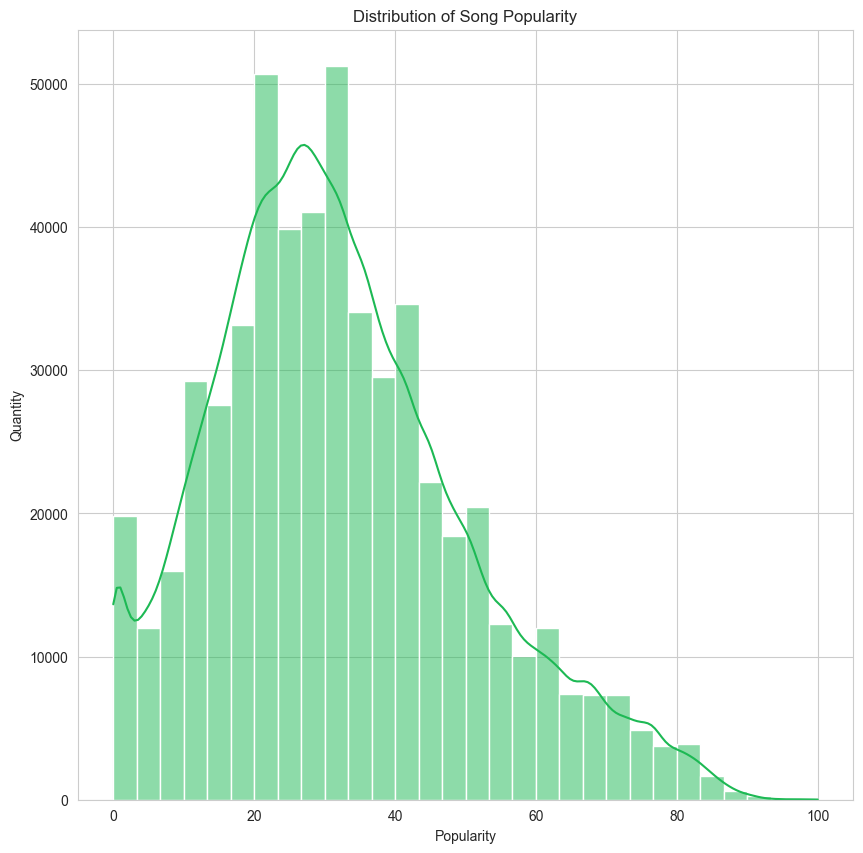

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

spotify_green = '#1DB954'

plt.figure(figsize=(10, 10))
sns.histplot(df['Popularity'], bins=30, kde=True, color=spotify_green)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Quantity')
plt.show()

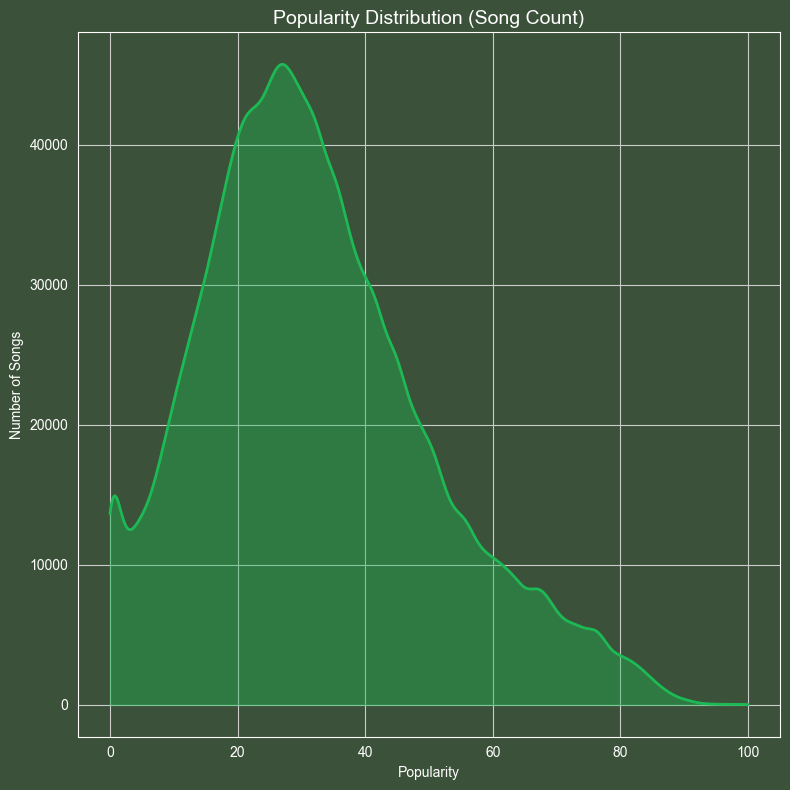

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Color setup
spotify_green = '#1DB954'
background_color = '#3b5139ff'

# Data
x = df['Popularity'].dropna()
n = len(x)

# Generate KDE
kde = gaussian_kde(x)
x_range = np.linspace(x.min(), x.max(), 500)
y_density = kde(x_range)

# Convert density to counts
bin_width = (x.max() - x.min()) / 30  # same as ~30 bins
y_counts = y_density * n * bin_width

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Filled area under KDE
ax.fill_between(x_range, y_counts, color=spotify_green, alpha=0.4)

# Line on top
ax.plot(x_range, y_counts, color=spotify_green, linewidth=2)

# Labels and style
ax.set_title('Popularity Distribution (Song Count)', color='white', fontsize=14)
ax.set_xlabel('Popularity', color='white')
ax.set_ylabel('Number of Songs', color='white')
ax.tick_params(colors='white')

for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()

C:\Users\Laney_Black\AppData\Local\Temp\ipykernel_3804\388854207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Key', y='Popularity', data=df, palette='Set2')


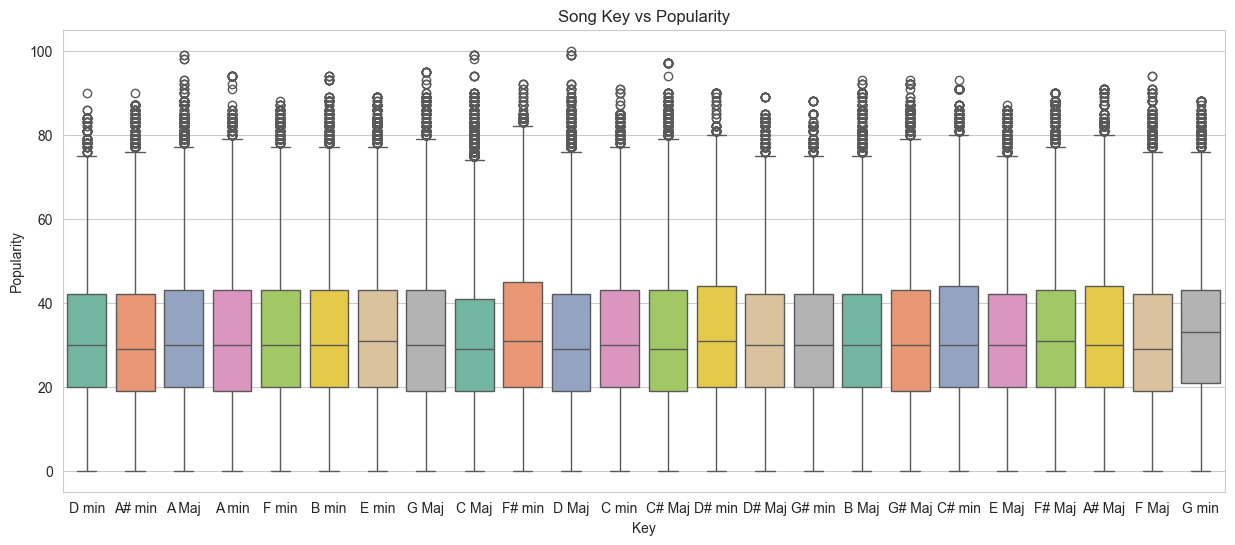

In [37]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Key', y='Popularity', data=df, palette='Set2')
plt.title('Song Key vs Popularity')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.show()

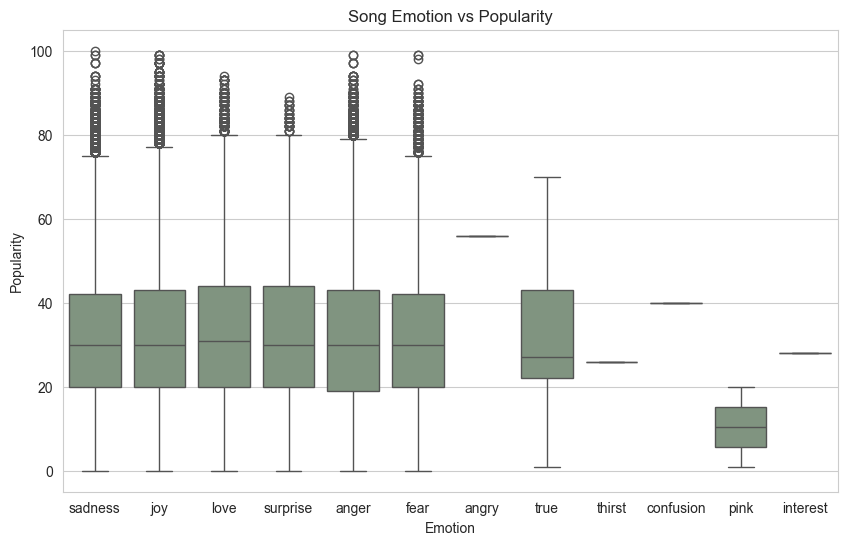

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='Popularity', data=df, color='#7c987cff')
plt.title('Song Emotion vs Popularity')
plt.xlabel('Emotion')
plt.ylabel('Popularity')
plt.show()

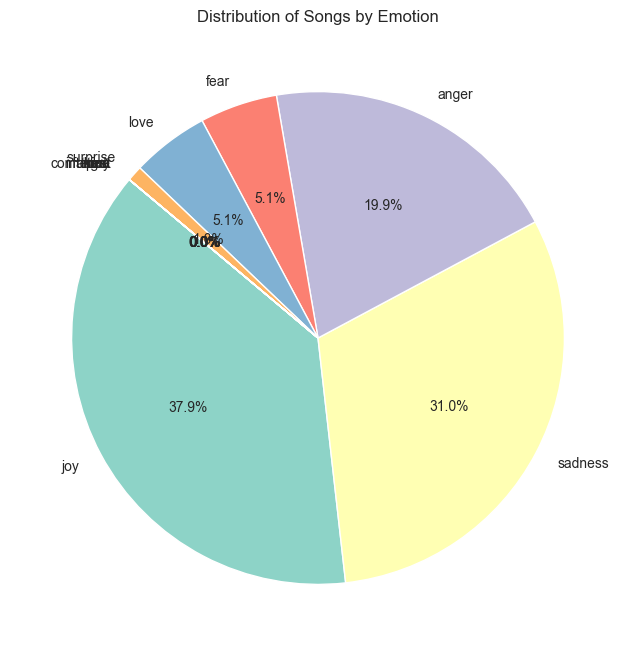

In [39]:
df['emotion'] = df['emotion'].str.lower()
emotion_counts = df['emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Set3"))
plt.title('Distribution of Songs by Emotion')
plt.show()

In [41]:
columns_to_drop = ['Artist(s)', 'song', 'Album', 'Similar Songs']
df = df.drop(columns=columns_to_drop)
df.columns

Index(['text', 'Length', 'emotion', 'ISRC', 'Genre', 'Release Date', 'Key',
       'Tempo', 'Loudness (db)', 'Time signature', 'Song Number', 'Explicit',
       'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness',
       'Liveness', 'Acousticness', 'Instrumentalness', 'Good for Party',
       'Good for Work/Study', 'Good for Relaxation/Meditation',
       'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching',
       'Good for Driving', 'Good for Social Gatherings',
       'Good for Morning Routine'],
      dtype='object')

In [42]:
df['Explicit'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
df['Explicit'] = df['Explicit'].map({'No': 0, 'Yes': 1})

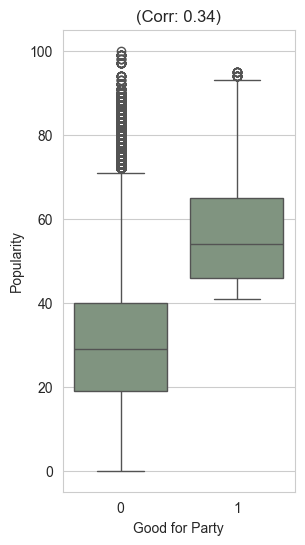

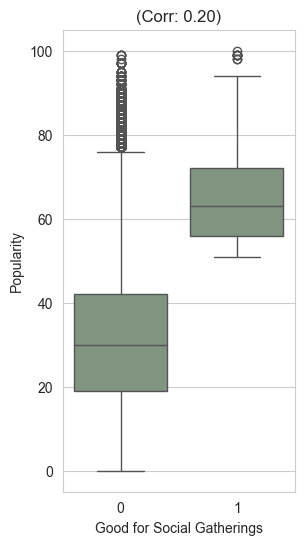

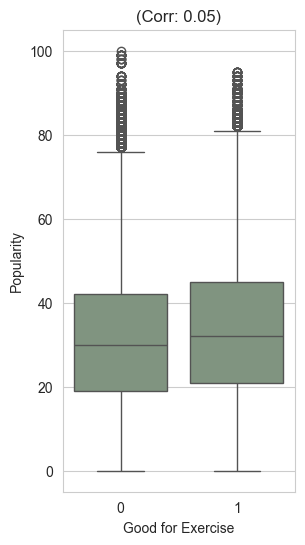

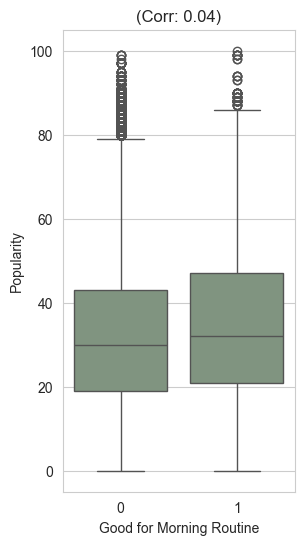

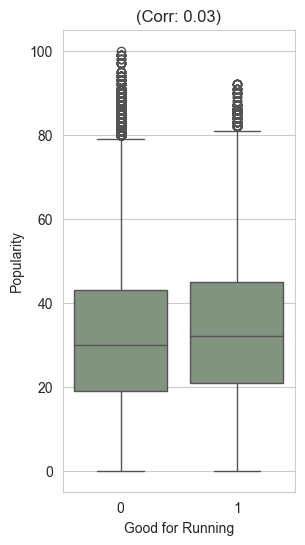

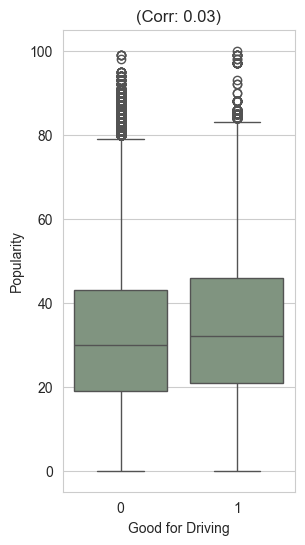

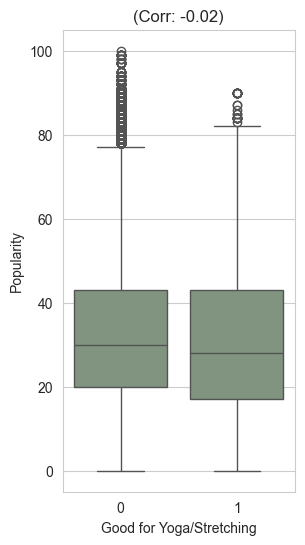

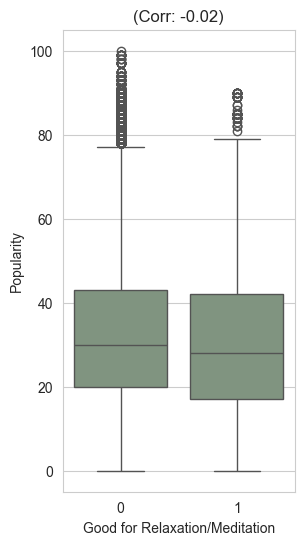

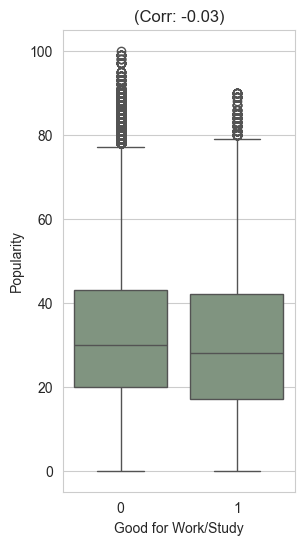

In [44]:
# Identify binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'explicit']

# Compute correlations
corrs = df[binary_cols + ['Popularity']].corr()['Popularity'].drop('Popularity')

# Keep meaningful correlation
relevant_binary = corrs[abs(corrs) > 0.01].sort_values(ascending=False)

# Step 4: Plot boxplots
for col in relevant_binary.index:
    plt.figure(figsize=(3, 6))
    sns.boxplot(data=df, x=col, y='Popularity', color='#7c987cff')
    plt.title(f'(Corr: {corrs[col]:.2f})')
    plt.show()

In [45]:
popular_song_count = (df['Popularity'] > 70).sum()
total_songs = len(df)
percent_popular = popular_song_count / total_songs * 100
print(popular_song_count)
df['Popularity'].value_counts(bins=[0, 20, 40, 60, 80, 100])
print(f"the percent of picking a popular song is: ", {percent_popular})

20380
the percent of picking a popular song is:  {np.float64(3.6957582197978756)}


In [46]:
import re
from datetime import datetime

df['Release Date Raw'] = df['Release Date']


def clean_date(date_str):
    if pd.isnull(date_str):
        return None
    cleaned = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', str(date_str))  # Remove suffixes
    return cleaned.strip()


df['Release Date'] = df['Release Date'].apply(clean_date)

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

current_year = datetime.today().year

df['song_age'] = current_year - df['Release Date'].dt.year
df['release_year'] = df['Release Date'].dt.year
df['release_month'] = df['Release Date'].dt.month

df[['song_age', 'release_year', 'release_month']] = df[[
    'song_age', 'release_year', 'release_month'
]].fillna(-1)

df.drop(columns=['Release Date', 'Release Date Raw'], inplace=True)

print(df[['song_age', 'release_year', 'release_month']].head())

   song_age  release_year  release_month
0        12          2013              4
1        12          2013              4
2        21          2004              6
3        10          2015             10
4        10          2015             10


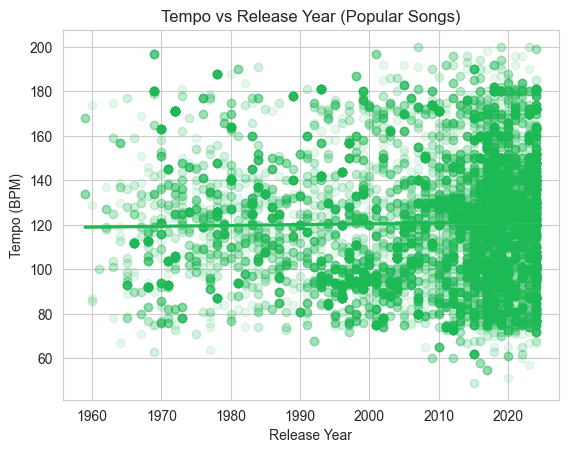

In [47]:
light_green = '#7c987cff'
# Filter for popular songs and valid release years
popular_songs = df[(df['Popularity'] >= 70) & (df['release_year'] >= 0)]

# Scatterplot
sns.regplot(data=popular_songs, x='release_year', y='Tempo', scatter_kws={'alpha': 0.1}, color=spotify_green)
plt.title("Tempo vs Release Year (Popular Songs)")
plt.xlabel("Release Year")
plt.ylabel("Tempo (BPM)")
plt.show()

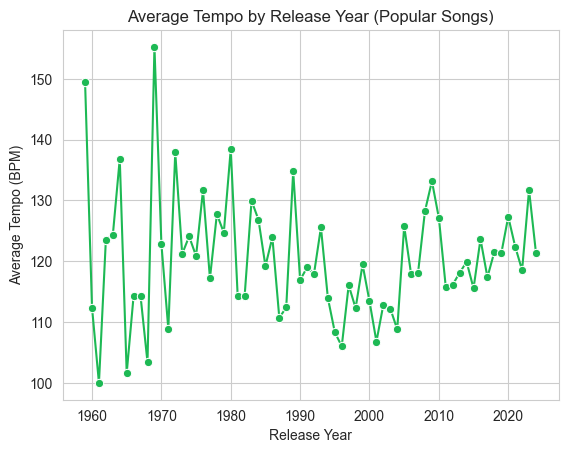

In [48]:
yearly_avg = popular_songs.groupby('release_year')['Tempo'].mean().reset_index()

# Plot
sns.lineplot(data=yearly_avg, x='release_year', y='Tempo', marker='o', color=spotify_green)
plt.title("Average Tempo by Release Year (Popular Songs)")
plt.xlabel("Release Year")
plt.ylabel("Average Tempo (BPM)")
plt.grid(True)
plt.show()

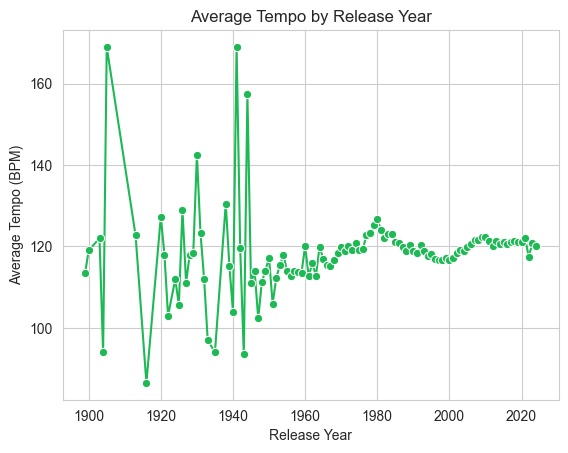

In [49]:
yearly_avg = df[(df['release_year'] >= 0)].groupby('release_year')['Tempo'].mean().reset_index()

# Plot
sns.lineplot(data=yearly_avg, x='release_year', y='Tempo', marker='o', color=spotify_green)
plt.title("Average Tempo by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Tempo (BPM)")
plt.grid(True)
plt.show()

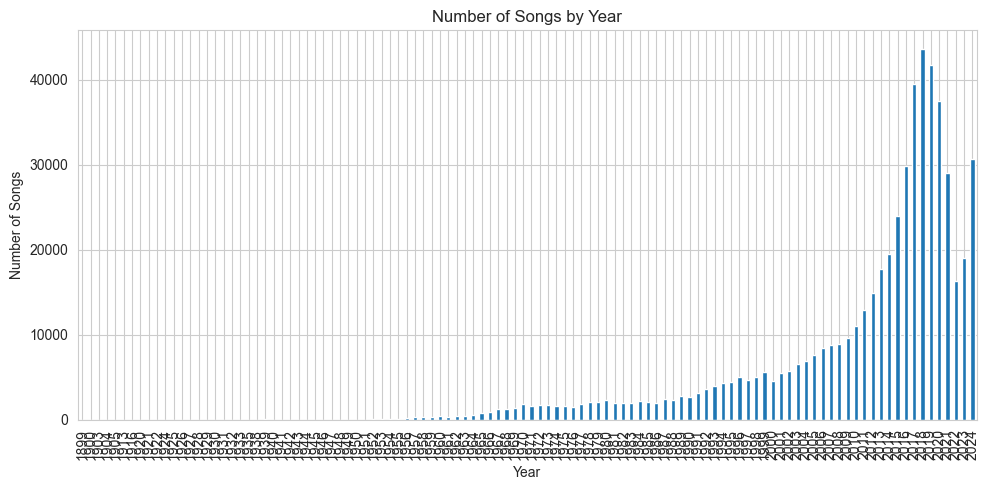

In [50]:
df[(df['release_year'] >= 0)]['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5),
                                                                               title='Number of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

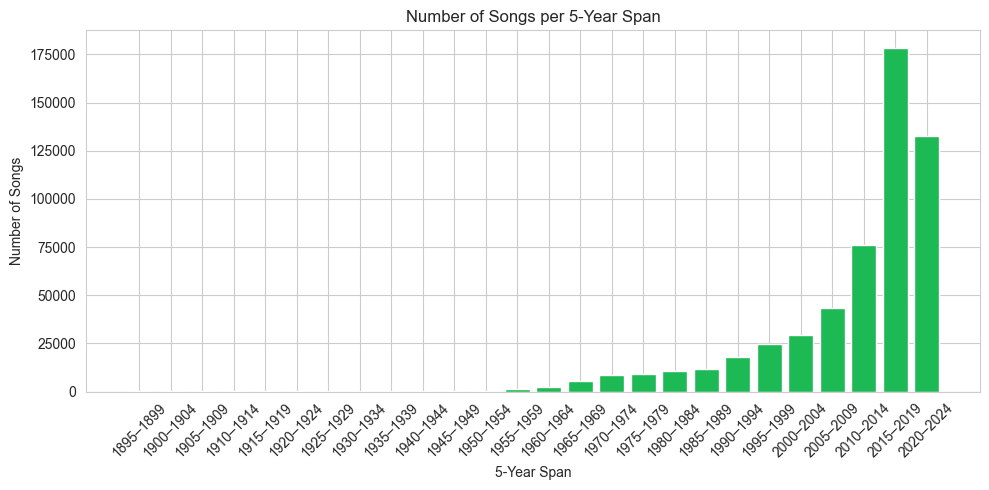

In [53]:
# Create 5-year bins (e.g., 2000–2004, 2005–2009, etc.)
df['year_bin'] = (df['release_year'] // 5) * 5

# Count songs in each 5-year bin
songs_by_bin = df[(df['release_year'] >= 0)]['year_bin'].value_counts().sort_index()

# Create bin labels like "2000–2004"
bin_labels = [f"{year}–{year + 4}" for year in songs_by_bin.index]

plt.figure(figsize=(10, 5))
plt.bar(bin_labels, songs_by_bin.values, color=spotify_green)
plt.xticks(rotation=45)
plt.xlabel('5-Year Span')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per 5-Year Span')
plt.tight_layout()
plt.show()

In [48]:
df

,text,Length,emotion,Genre,Key,Tempo,Loudness (db),Time signature,Explicit,Popularity,...,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Length_seconds,song_age,release_year,release_month,year_bin
0,Friends told her she was better off at the bot...,03:47,sadness,hip hop,D min,0.437870,0.785065,4/4,0,40,...,0,0,0,0,0,227,12.0,2013.0,4.0,2010.0
1,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,A# min,0.508876,0.805051,4/4,0,42,...,0,0,0,0,0,243,12.0,2013.0,4.0,2010.0
2,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,A Maj,0.532544,0.799419,4/4,0,29,...,0,0,0,0,0,351,21.0,2004.0,6.0,2000.0
3,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,A min,0.538462,0.811047,4/4,0,24,...,0,0,0,0,0,224,10.0,2015.0,10.0,2015.0
4,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,F min,0.544379,0.808321,4/4,0,30,...,0,0,0,0,0,360,10.0,2015.0,10.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,[Verse 1] I... I can't promise you that I won'...,04:36,anger,"rock,pop rock,alt-country",C# Maj,0.591716,0.816134,4/4,0,70,...,0,0,0,0,0,276,-1.0,-1.0,-1.0,-5.0
299996,[Verse 1] I lit out from Reno I was trailed by...,04:36,sadness,"rock,pop rock,alt-country",C# Maj,0.591716,0.816134,4/4,0,70,...,0,0,0,0,0,276,-1.0,-1.0,-1.0,-5.0
299997,"Just give me a second, darling, to clear my he...",04:36,anger,"rock,pop rock,alt-country",C# Maj,0.591716,0.816134,4/4,0,70,...,0,0,0,0,0,276,-1.0,-1.0,-1.0,-5.0
299998,Helpless she lies across the stairs Haunting y...,04:36,fear,"rock,pop rock,alt-country",C# Maj,0.591716,0.816134,4/4,0,70,...,0,0,0,0,0,276,-1.0,-1.0,-1.0,-5.0


In [49]:
df['Major'] = df['Key'].apply(lambda x: 0 if 'min' in str(x).lower() else (1 if 'maj' in str(x).lower() else None))